In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

from pylab import rcParams

import os
os.chdir("C:\\Users\\tamil\\OneDrive\\Documents\\Python Directory")

folder = "Bigmart/"

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)


df = pd.read_csv(folder+"bigmart_train.csv")
test_data = pd.read_csv(folder+"bigmart_test.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Basic Information About Data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [3]:
df.shape

(8523, 12)

In [4]:
print("Percentage of missing values")
print("============================")

for var in df.columns:
    if df[var].isna().sum() >0:
        miss = np.round(df[var].isna().sum()/df.shape[0] * 100,3)
        print(var, "has {0}% of missing values".format(miss))

Percentage of missing values
Item_Weight has 17.165% of missing values
Outlet_Size has 28.276% of missing values


# Analysing Target Variable

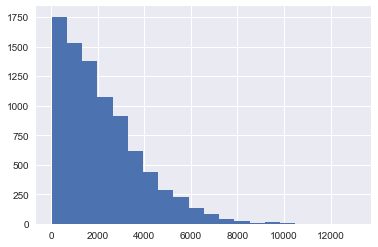

In [5]:
rcParams["figure.figsize"] = 6,4
target = df["Item_Outlet_Sales"]
target.hist(bins = 20);

Reponse Variable is highly Positive skewed, have to transform

### Checking outliers

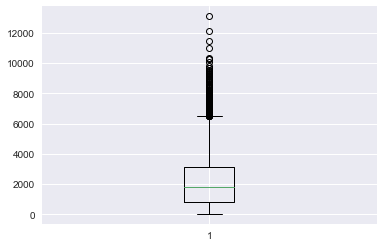

In [6]:
plt.boxplot(target);

### Box-cox transformation

0.34647755754885007


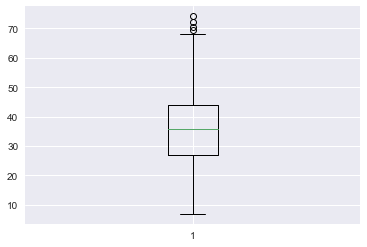

In [7]:
from scipy import stats
target_bx,fitted_lambda = stats.boxcox(target)
print(fitted_lambda)

# target_bx = np.log1p(target)

#checking outliers now

plt.boxplot(target_bx);

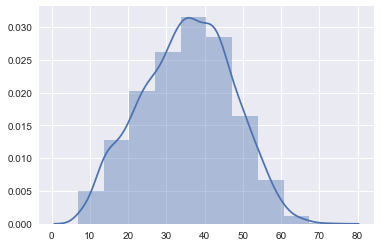

In [8]:
sns.distplot(target_bx, bins = 10)

Data is somewhat normaly distributed now

# Spliting Numerical And Categorical Data

In [9]:
#Combaining train and test
df = df.drop("Item_Outlet_Sales", axis = 1)
data = pd.concat([df,test_data],ignore_index=True, axis = 0)
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [10]:
#Numerical column

num_var = [var for var in data.columns if data[var].dtype != "object"]
num_data = data[num_var]

In [11]:
#Categorival columns

cat_var = [var for var in data.columns if data[var].dtype == "object"]
cat_data = data[cat_var]

# Analysing Numerical Variable

In [12]:
num_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.30,0.016047,249.8092,1999
1,5.92,0.019278,48.2692,2009
2,17.50,0.016760,141.6180,1999
3,19.20,0.000000,182.0950,1998
4,8.93,0.000000,53.8614,1987


### Visual Analytics On Numerical data

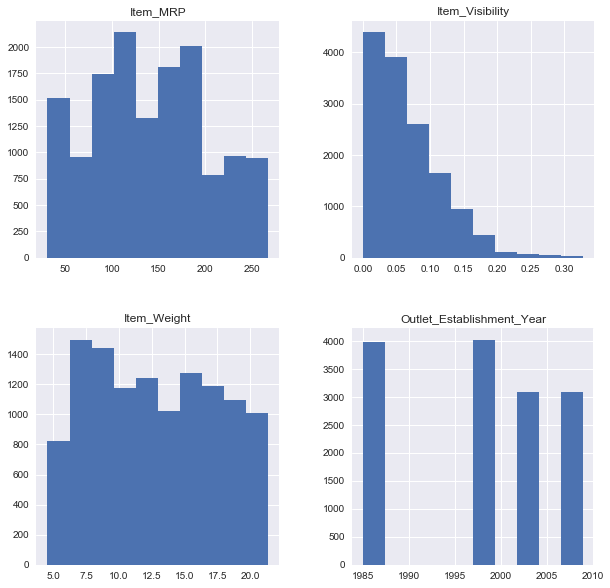

In [13]:
plt.rcParams["figure.figsize"] = 10,10
num_data.hist();

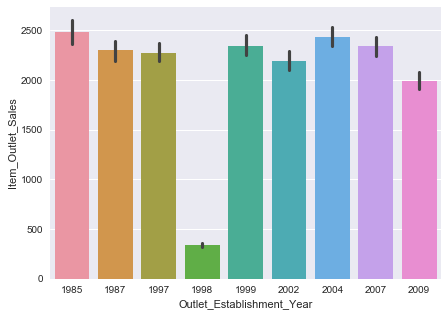

In [14]:
plt.figure(figsize = (7,5))
sns.barplot(df["Outlet_Establishment_Year"],target);

In [15]:
# sns.pairplot(num_data);

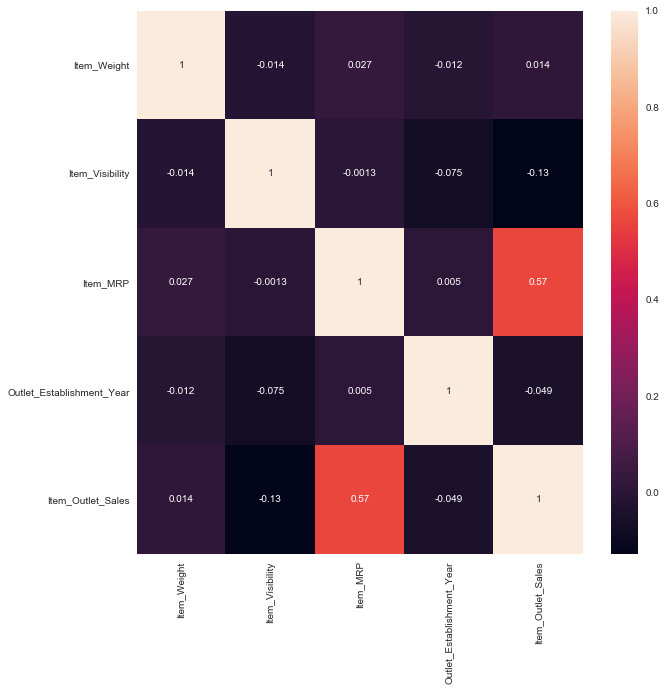

In [16]:
temp_data = pd.concat([df,target], axis = 1)
sns.heatmap(temp_data.corr(), annot = True);

No linearity between features, Item MRP feature is only related with Outlet sales.

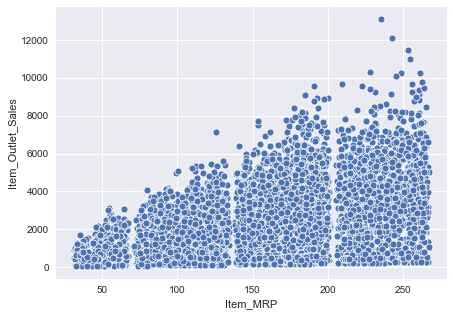

In [17]:
plt.figure(figsize=(7,5))
sns.scatterplot(x = "Item_MRP", y = "Item_Outlet_Sales", data = temp_data);

## Feature Engineering

In [18]:
current_year = 2020
num_data["Outlet_Age"] = current_year - num_data["Outlet_Establishment_Year"]
num_data.head()

C:\Users\tamil\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Age
0,9.30,0.016047,249.8092,1999,21
1,5.92,0.019278,48.2692,2009,11
2,17.50,0.016760,141.6180,1999,21
3,19.20,0.000000,182.0950,1998,22
4,8.93,0.000000,53.8614,1987,33


### 1. Handling Missing values

In [19]:
for var in num_data.columns:
    if num_data[var].isnull().sum()/num_data.shape[0] > 0.25:
        print("dropping {0}".format(var))
    else:
        num_data[var] = num_data[var].fillna(num_data[var].median())

if num_data[var].isnull().sum() > 1:
    print("There is missing values")
else:
    print("There is no missing values")



"""

check R

"""

There is no missing values


C:\Users\tamil\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


'\n\ncheck R\n\n'

### Feature Creation And Skew Correction

In [23]:
num_data["Item_Visibility"].skew()

0.12133160626235628

In [24]:
from scipy.stats import skew
iy,l = stats.yeojohnson(num_data["Item_Visibility"])
skew(iy)

0.011396726004802115

In [25]:
num_data["Item_Visibility"] = iy

C:\Users\tamil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
num_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Age
0,9.30,0.014570,249.8092,1999,21
1,5.92,0.017178,48.2692,2009,11
2,17.50,0.015154,141.6180,1999,21
3,19.20,-0.000000,182.0950,1998,22
4,8.93,-0.000000,53.8614,1987,33


In [27]:
num_data["Item_MRP"].skew()

0.13072836040225863

In [28]:
iy,l = stats.boxcox(num_data["Item_MRP"])
skew(iy)

-0.11511166802517413

In [29]:
num_data["Item_MRP"] = iy

C:\Users\tamil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
num_data["Item_Weight"].skew()

0.13471142395276792

In [31]:
iy,l = stats.boxcox(num_data["Item_Weight"])
skew(iy)

-0.0687338699935203

In [32]:
num_data["Item_Weight"] = iy

C:\Users\tamil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


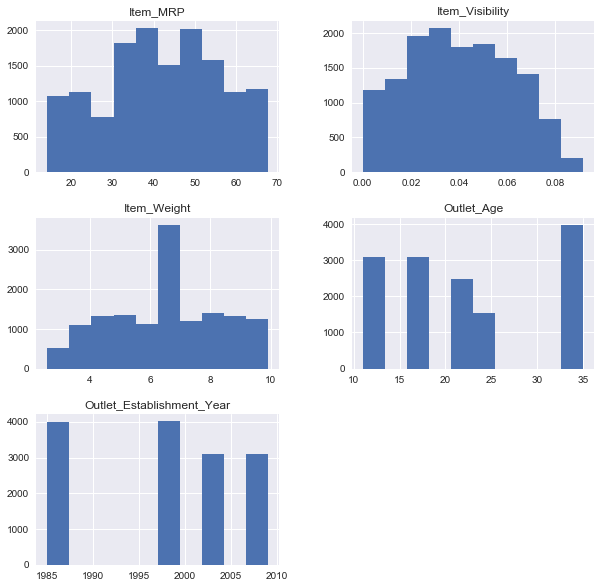

In [33]:
num_data.hist();

### Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(num_data)
std_data = std.transform(num_data)

In [35]:
num_data = pd.DataFrame(std_data, columns = num_data.columns)

In [36]:
num_data = num_data.drop(["Outlet_Establishment_Year"],axis = 1)
num_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,-0.790311,-1.162464,1.626498,-0.139681
1,-1.732935,-1.043837,-1.603338,-1.334228
2,1.102516,-1.135903,0.082011,-0.139681
3,1.452565,-1.824974,0.692011,-0.020226
4,-0.886982,-1.824974,-1.483297,1.293777


In [37]:
num_data.isnull().sum()

Item_Weight        0
Item_Visibility    0
Item_MRP           0
Outlet_Age         0
dtype: int64

# Analysing Categorical Variable

In [38]:
cat_data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [39]:
#Droping ID

cat_data = cat_data.drop(["Item_Identifier","Outlet_Identifier"], axis = 1)

In [40]:
for var in cat_data.columns:
    print("==========================")
    print(cat_data[var].value_counts())

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64


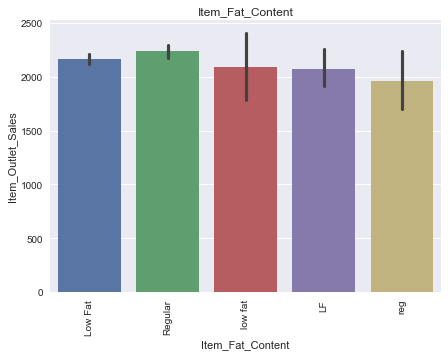

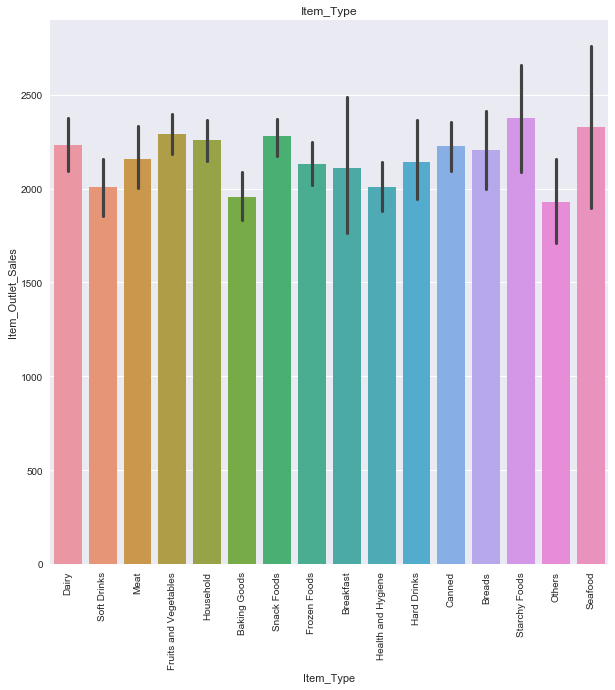

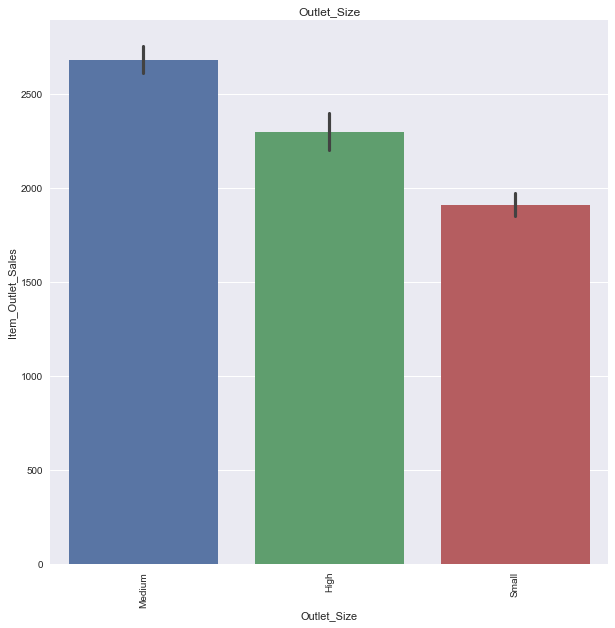

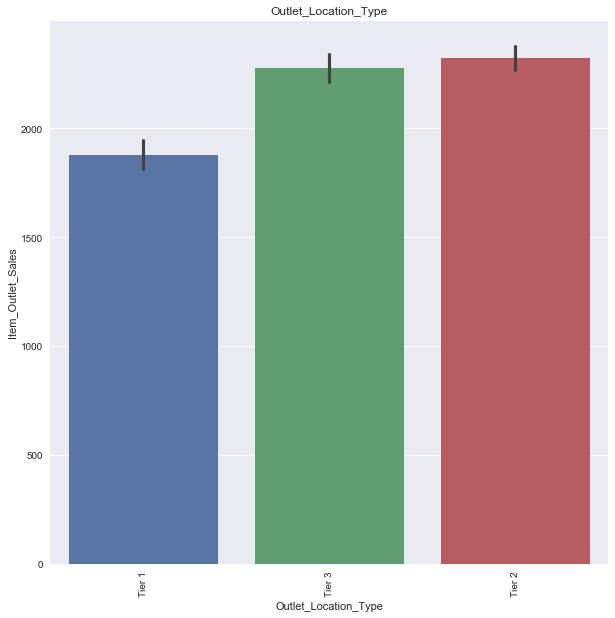

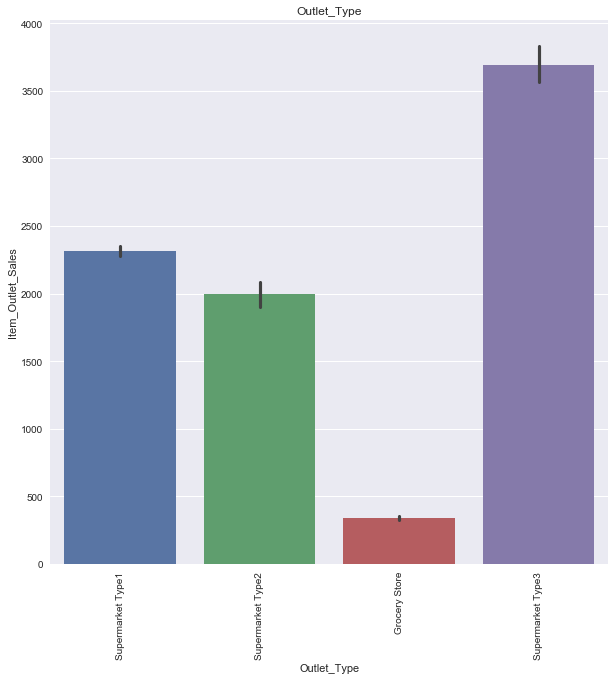

In [210]:
plt.figure(figsize=(7,5))
for var in cat_data.columns:
    sns.barplot(df[var],target)
    plt.xticks(rotation = 90)
    plt.title(var)
    plt.show()

In [42]:
cat_data.isnull().sum()/len(cat_data)

Item_Fat_Content        0.000000
Item_Type               0.000000
Outlet_Size             0.282737
Outlet_Location_Type    0.000000
Outlet_Type             0.000000
dtype: float64

Since, there is relation between outlet size and sale price simply we cant remove the outlet size variable

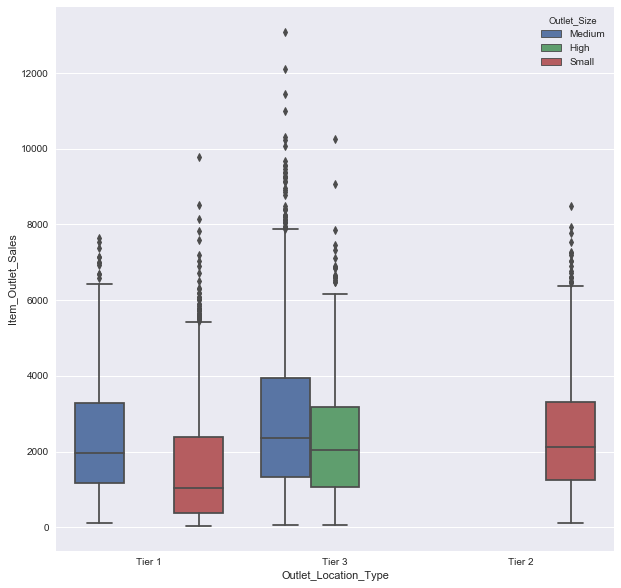

In [211]:
sns.boxplot(df["Outlet_Location_Type"],target,hue = df["Outlet_Size"])

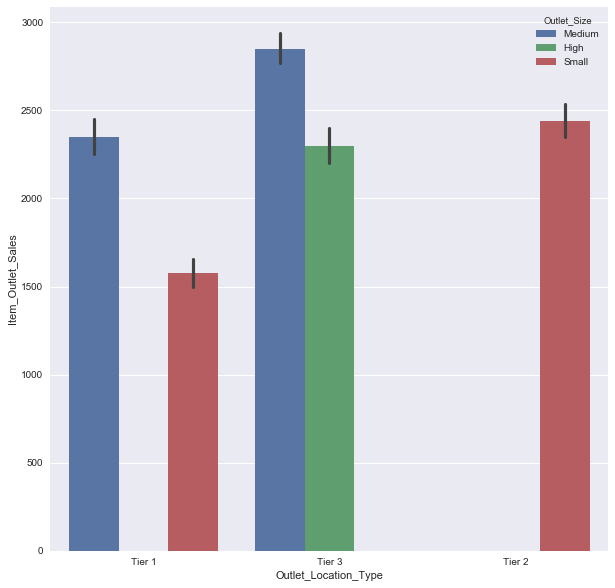

In [212]:
sns.barplot(df["Outlet_Location_Type"],target,hue = df["Outlet_Size"])

In [45]:
outlet_location_dict = {"Tier 1":2,"Tier 2":1,"Tier 3":0}
cat_data["Outlet_Location_Type"] = cat_data["Outlet_Location_Type"].map(outlet_location_dict)

In [46]:
outlet_size_dict = {"High":2,"Medium":1,"Small":0}
cat_data["Outlet_Size"] = cat_data["Outlet_Size"].map(outlet_size_dict)

In [51]:
cat_data["Outlet_Size"] = cat_data["Outlet_Size"].fillna(1.0)
cat_data["Outlet_Size"] = cat_data["Outlet_Size"].astype(int)

In [53]:
cat_data.isnull().sum()

Item_Fat_Content        0
Item_Type               0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

## One Hot Encoding

In [56]:
cat_dummies = pd.get_dummies(cat_data, drop_first=True)
cat_dummies.head()

,Outlet_Size,Outlet_Location_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [57]:
df.shape[0]

8523

In [177]:
final_data = pd.concat([num_data,cat_dummies], axis = 1)

# final_data = cat_dummies.drop(["Unnamed: 0","X"],axis = 1)

train = final_data.iloc[:8523,:]
test = final_data[df.shape[0]:]

# MODEL BUILDING

In [59]:
X= train
Y = target_bx

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3)

### Random Forest

In [270]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
pred = model.predict(x_train)

In [66]:
def RMSE(predictions, targets):

    differences = predictions - targets                       # the DIFFERENCEs.

    differences_squared = differences ** 2                    # the SQUAREs of ^

    mean_of_differences_squared = differences_squared.mean()  # the MEAN of ^

    rmse_val = np.sqrt(mean_of_differences_squared)           # ROOT of ^

    return rmse_val 

In [280]:
from sklearn import metrics

#training accuracy

rmse = RMSE(pred,y_train)
rmse

2.60921302881374

In [282]:
#test accuracy
pred = model.predict(x_test)
rmse = RMSE(pred,y_test)
rmse

6.8256786632855135

### XG Boost

In [283]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train,y_train)
pred = model.predict(x_train)

rmse = np.sqrt(metrics.mean_squared_error(y_train,pred))
print(rmse)

4.0804114210431575


In [284]:
pred = model.predict(x_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test,pred))
print(rmse)

6.962619898479108


In [285]:
from sklearn.model_selection import RandomizedSearchCV

# n_estimators = [100, 500, 900, 1100, 1500]
# max_depth = [2, 3, 5, 10, 15]
# booster = ['gbtree', 'gblinear']
# base_score = [0.25, 0.5, 0.75, 0.99]
# learning_rate = [0.05, 0.1, 0.15, 0.20]
# min_child_weight = [1, 2, 3, 4]

# hyperparameter_grid = {'n_estimators': n_estimators, 'max_depth': max_depth,
#                        'learning_rate' : learning_rate, 'min_child_weight' : min_child_weight, 
#                        'booster' : booster, 'base_score' : base_score
#                       }

# xgb_model = XGBRegressor()

# xgb_cv = RandomizedSearchCV(estimator=xgb_model, param_distributions=hyperparameter_grid,
#                                cv=5, n_iter=100,n_jobs =-1, iid=True,
#                                verbose=1, return_train_score = True, random_state=42)
# xgb_cv.fit(x_train,y_train)

In [286]:
# xgb_cv.best_estimator_

### Tuned XGBoost

In [287]:
model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)
model.fit(x_train,y_train)
pred = model.predict(x_train)

rmse = np.sqrt(metrics.mean_squared_error(y_train,pred))
print(rmse)

6.30254769481785


In [288]:
pred = model.predict(x_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test,pred))
print(rmse)

6.487879606813459


# Feature Selection

#### Chi Square selection

In [290]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# chi_selector = SelectKBest(chi2,k = 15)
# chi_selector.fit(x_train,y_train)
# chi_support = chi_selector.get_support()
# chi_feature = X.loc[:,chi_support].columns.tolist()
# print(chi_feature)


""" values must be non negative"""

' values must be non negative'

#### RFE Selector

In [324]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
rfe_selector = RFE(estimator=Lasso(), n_features_to_select=15, step=10, verbose=5)
rfe_selector.fit(X,Y)

Fitting estimator with 28 features.
Fitting estimator with 18 features.


RFE(estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
                    normalize=False, positive=False, precompute=False,
                    random_state=None, selection='cyclic', tol=0.0001,
                    warm_start=False),
    n_features_to_select=15, step=10, verbose=5)

In [325]:
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(rfe_feature)

['Item_Visibility', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular', 'Item_Fat_Content_low fat', 'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']


#### Model with RFE Features

In [336]:
x_train_rfe = x_train[rfe_feature]
x_test_rfe = x_test[rfe_feature]

model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)
model.fit(x_train_rfe,y_train)
pred = model.predict(x_train_rfe)

rmse = np.sqrt(metrics.mean_squared_error(y_train,pred))
print(rmse)

pred = model.predict(x_test_rfe)
rmse = np.sqrt(metrics.mean_squared_error(y_test,pred))
print(rmse)

x_rfe = X[rfe_feature]

model.fit(x_rfe,Y)

6.5107095352396325
6.519232385820358


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [330]:
x_train_rfe.head()

,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8120,0.457493,-1.438563,1,0,1,0,0,0,0,0,0,0,0,0,1
2301,-1.203947,-0.296799,1,0,1,0,0,0,0,0,0,0,0,1,0
4474,-0.420095,-0.652096,0,2,1,0,0,0,0,0,0,0,1,0,0
6583,1.308408,0.241580,2,0,1,0,0,0,0,0,0,0,1,0,0
1034,0.463108,-1.792512,1,0,0,0,0,0,0,0,0,1,0,0,0


#### Treebased selector

In [60]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

embeded_rf_selector = SelectFromModel(RandomForestRegressor(n_estimators=100), max_features=15)
embeded_rf_selector.fit(X,Y)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                                criterion='mse', max_depth=None,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                max_samples=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=100, n_jobs=None,
                                                oob_score=False,
                                                random_state=None, verbose=0,
                                                war

In [347]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(embeded_rf_feature)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']


In [80]:
x_train_tb = x_train[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age', 'Outlet_Type_Supermarket Type1',
                      'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']]
x_test_tb = x_test[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age', 'Outlet_Type_Supermarket Type1',
                    'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']]

from xgboost import XGBRegressor
from sklearn import metrics

xgb_reg = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)
xgb_reg.fit(x_train_tb,y_train)
pred = xgb_reg.predict(x_train_tb)

rmse = np.sqrt(metrics.mean_squared_error(y_train,pred))
print(rmse)

pred = model.predict(x_test_tb)
rmse = np.sqrt(metrics.mean_squared_error(y_test,pred))
print(rmse)

x_tb= X[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age', 'Outlet_Type_Supermarket Type1',
         'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']]

xgb_reg.fit(x_tb,Y)


"""last"""

6.275568429677341
6.439476183282035


'last'

In [81]:
xgb_reg = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

### Tuning RF With Selected Feature

##### Orginal Model

In [67]:
model = RandomForestRegressor()
model.fit(x_train_tb,y_train)
pred = model.predict(x_train_tb)
print(RMSE(pred,y_train))
predts = model.predict(x_test_tb)
print(RMSE(predts,y_test))

2.590515778075998
7.019724336746747


##### Tuning

In [381]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
max_depth.append(3)
max_depth.append(5)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None, 3, 5], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [382]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
"""Random search of parameters, using 3 fold cross validation, 
search across 100 different combinations, and use all available cores"""
rccv = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                          n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

rccv.fit(x_train_tb,y_train)

rccv.best_estimator_
# best_params = rccv.best_params_
# best_score = rccv.best_score_

# print(best_params)
# print(best_score)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 28.8min finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [68]:
model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
model.fit(x_train_tb,y_train)
pred = model.predict(x_train_tb)

rmse = np.sqrt(metrics.mean_squared_error(y_train,pred))
print(rmse)

pred = model.predict(x_test_tb)
rmse = np.sqrt(metrics.mean_squared_error(y_test,pred))
print(rmse)

6.379865273612518
6.553843527806594


In [82]:
rf_reg = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
# rf_reg.fit(x_tb,Y)

# ANN

In [144]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

Using TensorFlow backend.


In [202]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
import tensorflow as tf
from keras.optimizers import SGD

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(init = 'he_uniform',units = 7,activation='relu',input_dim = 7))

# Adding the second hidden layer
classifier.add(Dense(init = 'he_uniform',activation='relu',units = 4))

# Adding the third hidden layer
classifier.add(Dense(init = 'he_uniform',activation='relu',units = 4))

# Adding the forth hidden layer
classifier.add(Dense(init = 'he_uniform',activation='relu',units = 4))

# Adding the fifth hidden layer
classifier.add(Dense(init = 'he_uniform',activation='relu',units = 4))

# Adding the Sixth hidden layer
classifier.add(Dense(init = 'he_uniform',activation='relu',units = 4))

# Adding the Seventh hidden layer
# classifier.add(Dense(init = 'he_uniform',activation='relu',units = 3))

# Adding the output layer
classifier.add(Dense(init = 'he_uniform',units = 1))

# Compiling the ANN

opt = tf.keras.optimizers.RMSprop(0.0001)
classifier.compile(loss=root_mean_squared_error, optimizer=opt)

# Fitting the ANN to the Training set
model_history=classifier.fit(x_tb.values,Y,validation_split=0.30, batch_size = 10, nb_epoch = 1000)

C:\Users\tamil\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=7, activation="relu", input_dim=7, kernel_initializer="he_uniform")`
  
C:\Users\tamil\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=4, kernel_initializer="he_uniform")`
C:\Users\tamil\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=4, kernel_initializer="he_uniform")`
C:\Users\tamil\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=4, kernel_initializer="he_uniform")`
C:\Users\tamil\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=4, kernel_initializer="he_uniform")`
C:\U

Train on 5966 samples, validate on 2557 samples
Epoch 1/1000
5966/5966 [==============================] - 1s 130us/step - loss: 36.6496 - val_loss: 35.8928
Epoch 2/1000
5966/5966 [==============================] - 1s 109us/step - loss: 35.3231 - val_loss: 33.9585
Epoch 3/1000
5966/5966 [==============================] - 1s 140us/step - loss: 32.5059 - val_loss: 30.0600
Epoch 4/1000
5966/5966 [==============================] - 1s 164us/step - loss: 27.5151 - val_loss: 23.9545
Epoch 5/1000
5966/5966 [==============================] - 1s 168us/step - loss: 21.1390 - val_loss: 18.1850
Epoch 6/1000
5966/5966 [==============================] - 1s 162us/step - loss: 16.4158 - val_loss: 14.6946
Epoch 7/1000
5966/5966 [==============================] - 1s 170us/step - loss: 13.3090 - val_loss: 12.1639
Epoch 8/1000
5966/5966 [==============================] - 1s 171us/step - loss: 11.2380 - val_loss: 10.6752
Epoch 9/1000
5966/5966 [==============================] - 1s 169us/step - loss: 10.1506 

In [203]:
pred = classifier.predict(final_test) #1162

##### Tuning ANN

In [166]:
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid



def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=7))
            model.add(Activation(activation))
#             model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
#             model.add(Dropout(0.3))
            
    model.add(Dense(units = 1, kernel_initializer= 'he_uniform', activation = 'relu')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss=root_mean_squared_error)
    return model
    
model = KerasRegressor(build_fn=create_model, verbose=0)


layers = [(5, 4), (5, 5, 4),(4,4,4,4),(5,5,4,4,4,4),(4,4,4,4,4,4),(6,5,4,4)]
activations = ['relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [32,128], epochs=[500])
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)

In [167]:
grid_result = grid.fit(x_tb.values, Y)

[grid_result.best_score_,grid_result.best_params_]

[-8.49549376445125,
 {'activation': 'relu', 'batch_size': 32, 'epochs': 50, 'layers': (5, 4)}]

In [169]:
pred = grid.predict(final_test) #rmse : 1400 ... bad

# Stack Models

### Simple Stacking : Averaging Base Model

In [83]:
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin,clone

class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
#Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [84]:
#Validation function
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, x_tb.values, Y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [85]:
averaged_models = AveragingModels(models = (xgb_reg, rf_reg))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 6.5180 (0.0747)



In [86]:
averaged_models.fit(x_train_tb,y_train)
avg_pred =averaged_models.predict(x_test_tb)
rmse = np.sqrt(metrics.mean_squared_error(y_test,avg_pred))
print(rmse)

6.54180854992274


In [88]:
averaged_models.fit(x_tb,Y)
avg_pred_test = averaged_models.predict(final_test)

### Stacking Average Model Class

In [95]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
    
      #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [104]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso


GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

# model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
#                               learning_rate=0.05, n_estimators=720,
#                               max_bin = 55, bagging_fraction = 0.8,
#                               bagging_freq = 5, feature_fraction = 0.2319,
#                               feature_fraction_seed=9, bagging_seed=9,
#                               min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)


lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [105]:
stacked_averaged_models = StackingAveragedModels(base_models = (xgb_reg, rf_reg),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 6.5128 (0.0735)


In [106]:
stacked_averaged_models.fit(x_train_tb.values,y_train)
avg_pred =stacked_averaged_models.predict(x_test_tb.values)
rmse = np.sqrt(metrics.mean_squared_error(y_test,avg_pred))
print(rmse)

6.535869099698893


In [108]:
stacked_averaged_models.fit(x_tb.values,Y)
avg_pred_test = stacked_averaged_models.predict(final_test.values) """worked fine 1161 rmse"""

### Ensembling

##### XGBoost

In [118]:
xgb_reg.fit(x_tb.values,Y)
xgb_pred_train = xgb_reg.predict(x_tb.values)
xgb_pred_test = xgb_reg.predict(final_test.values)
print(RMSE(xgb_pred_train,Y))

6.342864050543177


##### Random Forest

In [120]:
rf_reg.fit(x_tb.values,Y)
rf_pred_train = rf_reg.predict(x_tb.values)
rf_pred_test = rf_reg.predict(final_test.values)
print(RMSE(rf_pred_train,Y))

6.4150740620124544


##### Stacked Average Model

In [121]:
stacked_averaged_models.fit(x_tb.values,Y)
avg_pred_train =stacked_averaged_models.predict(x_tb.values)
avg_pred_test =stacked_averaged_models.predict(final_test.values)
print(RMSE(avg_pred_train,Y))

6.362260516193485


##### Ensembling and checking train avg scr

In [129]:
'''RMSE on the entire Train data when averaging'''

print('RMSE score on train data:')
print(RMSE(avg_pred_train*0.55 +
               xgb_pred_train*0.35 + rf_pred_train*0.10, Y))

RMSE score on train data:
6.352110276882525


In [137]:
ensembling = avg_pred_test*0.70 + xgb_pred_test*0.15 + rf_pred_test*0.15 #1162 rmse

# SUBMISSION

In [178]:
final_test = test.copy()

final_test = final_test[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age', 'Outlet_Type_Supermarket Type1',
         'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']]

In [204]:
from scipy.special import boxcox, inv_boxcox
sales_rev = inv_boxcox(pred,fitted_lambda)

In [205]:
sales_rev

array([[1590.7384],
       [1374.3092],
       [ 695.981 ],
       ...,
       [1734.8381],
       [3609.746 ],
       [1187.8453]], dtype=float32)

In [206]:
submission = pd.DataFrame()
submission["Item_Identifier"] = test_data["Item_Identifier"]
submission["Outlet_Identifier"] = test_data["Outlet_Identifier"]
submission["Item_Outlet_Sales"] = sales_rev
submission.isna().sum()

Item_Identifier      0
Outlet_Identifier    0
Item_Outlet_Sales    0
dtype: int64

In [208]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1590.738403
1,FDW14,OUT017,1374.309204
2,NCN55,OUT010,695.981018
3,FDQ58,OUT017,2476.666016
4,FDY38,OUT027,6022.897949


In [209]:
submission.to_csv(folder+"submission.csv",index = False)
print("Submission is ready")

Submission is ready
